In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [311]:
df_shots = pd.read_csv('../data/Assignment 3/Understat/shots_epl_20-21.csv')

df_shots.head(22)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,2020.0,RightFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Pass
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Calum Chambers,Pass
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
5,424180.0,23.0,MissedShots,0.953,0.569,0.146352,Pierre-Emerick Aubameyang,h,318.0,OpenPlay,2020.0,OtherBodyPart,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Martin Odegaard,Cross
6,424181.0,26.0,SavedShot,0.813,0.729,0.017914,Thomas Partey,h,2328.0,OpenPlay,2020.0,RightFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass
7,424182.0,26.0,BlockedShot,0.689,0.457,0.017331,Granit Xhaka,h,204.0,FromCorner,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
8,424183.0,28.0,SavedShot,0.727,0.299,0.035846,Granit Xhaka,h,204.0,DirectFreekick,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,NaN,Standard
9,424186.0,43.0,ShotOnPost,0.910,0.603,0.013912,Gabriel,h,5613.0,FromCorner,2020.0,Head,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Aerial


In [312]:
df_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9235 entries, 0 to 9234
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9235 non-null   float64
 1   minute           9235 non-null   float64
 2   result           9235 non-null   object 
 3   X                9235 non-null   float64
 4   Y                9235 non-null   float64
 5   xG               9235 non-null   float64
 6   player           9235 non-null   object 
 7   h_a              9235 non-null   object 
 8   player_id        9235 non-null   float64
 9   situation        9235 non-null   object 
 10  season           9235 non-null   float64
 11  shotType         9235 non-null   object 
 12  match_id         9235 non-null   float64
 13  h_team           9235 non-null   object 
 14  a_team           9235 non-null   object 
 15  h_goals          9235 non-null   float64
 16  a_goals          9235 non-null   float64
 17  date          

In [313]:
df_shots = df_shots[df_shots.date > '2021-01-24']

In [314]:
len(df_shots)

4794

In [315]:
df_shots.match_id.nunique()

195

In [316]:
df_shots.h_team.nunique()

20

In [317]:
df_shots.a_team.nunique()

20

In [318]:
df_shots.player_id.nunique()

382

In [319]:
df_shots.situation.unique()

array(['OpenPlay', 'FromCorner', 'DirectFreekick', 'SetPiece', 'Penalty'],
      dtype=object)

In [320]:
df_shots.lastAction.unique()

array(['Pass', 'Cross', 'Standard', 'Aerial', 'None', 'TakeOn',
       'CornerAwarded', 'Chipped', 'Dispossessed', 'Rebound', 'BallTouch',
       'Tackle', 'Throughball', 'BallRecovery', 'HeadPass', 'LayOff',
       'FormationChange', 'Challenge', 'Foul', 'End', 'BlockedPass',
       'Interception', 'OffsidePass', 'SubstitutionOn', 'GoodSkill',
       'OffsideProvoked', 'Goal', 'Clearance'], dtype=object)

In [321]:
df_shots.shotType.unique()

array(['LeftFoot', 'RightFoot', 'OtherBodyPart', 'Head'], dtype=object)

In [322]:
df_shots.result.unique()

array(['BlockedShot', 'MissedShots', 'SavedShot', 'ShotOnPost', 'Goal',
       'OwnGoal'], dtype=object)

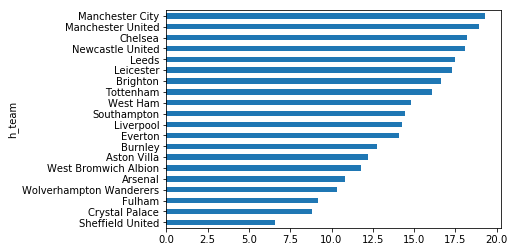

In [343]:
df_shots[df_shots.h_a == 'h'].groupby('h_team')['xG'].sum().sort_values().plot(kind='barh')

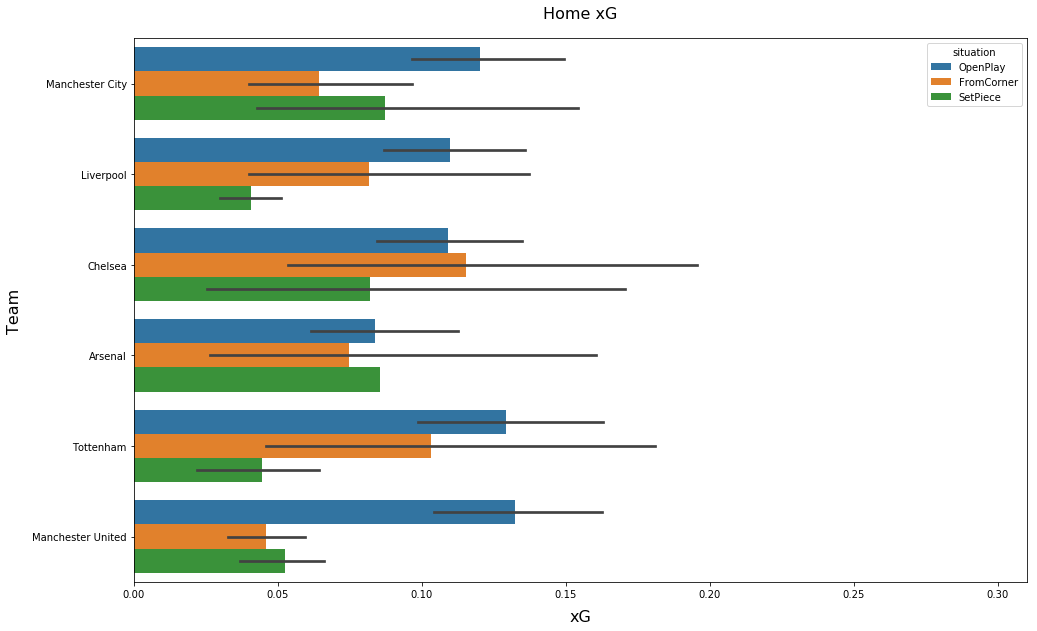

In [392]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(data=df_shots[(df_shots.h_team.isin(['Manchester City', 'Liverpool', 'Manchester United', 'Tottenham', 'Arsenal', 'Chelsea'])) 
                          & (df_shots.h_a == 'h') & (df_shots.situation.isin(['OpenPlay', 'FromCorner', 'SetPiece']))], 
            x="xG", y="h_team", hue="situation", order=['Manchester City', 'Liverpool', 'Chelsea', 'Arsenal', 'Tottenham', 'Manchester United'])
ax.set_xlim(0, 0.31)
ax.set_title("Home xG", fontsize = 16, pad=20)
ax.set_ylabel('Team', fontsize = 16,labelpad=10)
ax.set_xlabel('xG', fontsize = 16, labelpad=10);

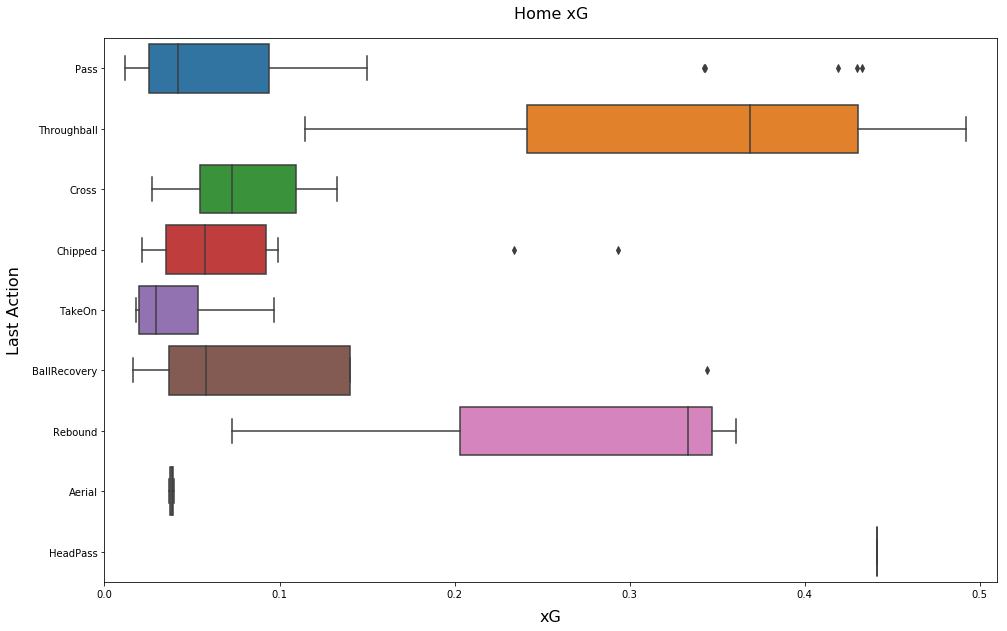

In [393]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(data=df_shots[(df_shots.h_team == 'Chelsea') & (df_shots.h_a == 'h') & (df_shots.situation == 'OpenPlay') & (df_shots.lastAction != 'None')], 
            x="xG", y="lastAction", order=['Pass', 'Throughball', 'Cross', 'Chipped', 'TakeOn', 'BallRecovery', 'Rebound', 'Aerial', 'HeadPass'])
ax.set_xlim(0, 0.51)
ax.set_title("Home xG", fontsize = 16, pad=20)
ax.set_ylabel('Last Action', fontsize = 16,labelpad=10)
ax.set_xlabel('xG', fontsize = 16, labelpad=10);

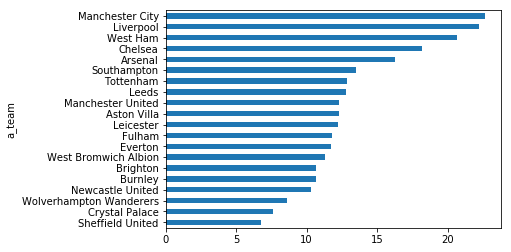

In [358]:
df_shots[df_shots.h_a == 'a'].groupby('a_team')['xG'].sum().sort_values().plot(kind='barh')

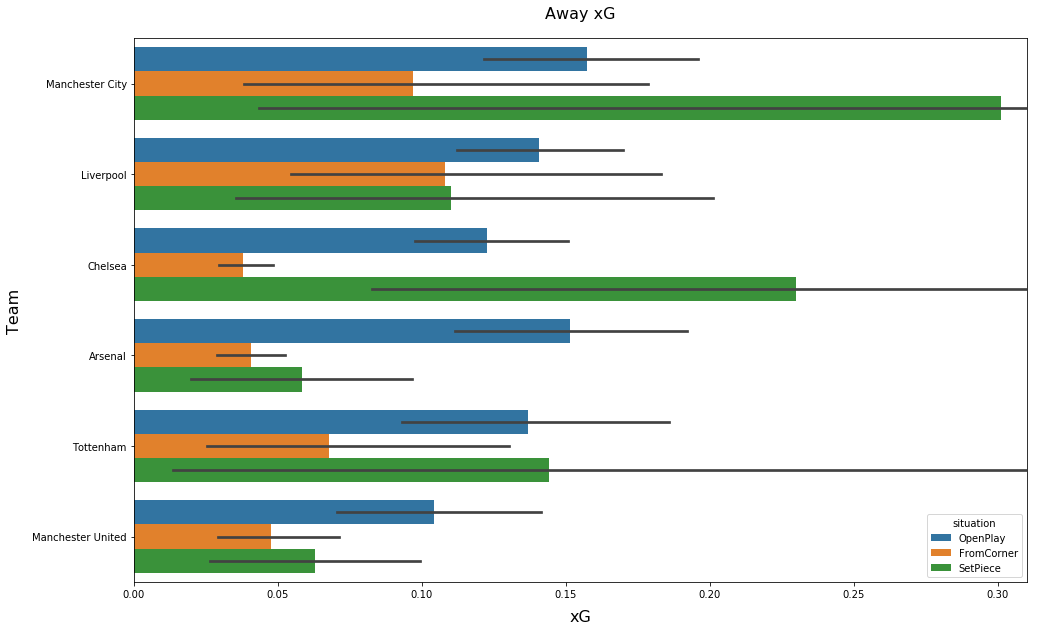

In [391]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(data=df_shots[(df_shots.a_team.isin(['Manchester City', 'Liverpool', 'Manchester United', 'Tottenham', 'Arsenal', 'Chelsea'])) 
                          & (df_shots.h_a == 'a') & (df_shots.situation.isin(['OpenPlay', 'FromCorner', 'SetPiece']))], 
            x="xG", y="a_team", hue="situation", order=['Manchester City', 'Liverpool', 'Chelsea', 'Arsenal', 'Tottenham', 'Manchester United'])
ax.set_xlim(0, 0.31)
ax.set_title("Away xG", fontsize = 16, pad=20)
ax.set_ylabel('Team', fontsize = 16,labelpad=10)
ax.set_xlabel('xG', fontsize = 16, labelpad=10);

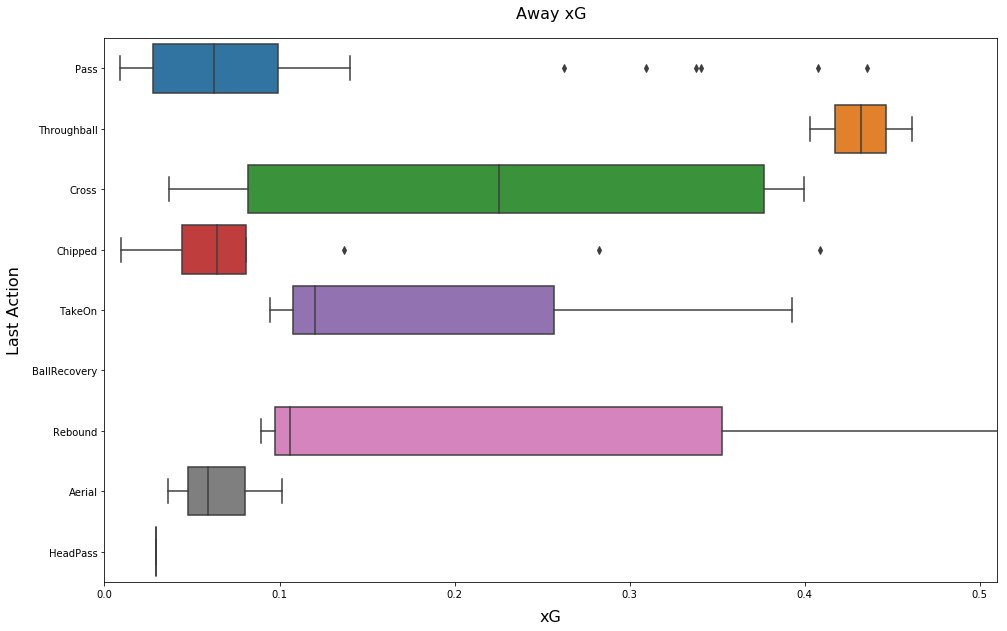

In [395]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(data=df_shots[(df_shots.a_team == 'Chelsea') & (df_shots.h_a == 'a') & (df_shots.situation == 'OpenPlay') & (df_shots.lastAction != 'None')], 
            x="xG", y="lastAction", order=['Pass', 'Throughball', 'Cross', 'Chipped', 'TakeOn', 'BallRecovery', 'Rebound', 'Aerial', 'HeadPass'])
ax.set_xlim(0, 0.51)
ax.set_title("Away xG", fontsize = 16, pad=20)
ax.set_ylabel('Last Action', fontsize = 16,labelpad=10)
ax.set_xlabel('xG', fontsize = 16, labelpad=10);

In [323]:
home_xG = df_shots[df_shots.h_a == 'h'].groupbyby('h_team')['xG'].sum()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,424175.0,3.0,BlockedShot,0.792,0.675,0.023008,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
1,424176.0,5.0,MissedShots,0.714,0.493,0.018891,Thomas Partey,h,2328.0,OpenPlay,2020.0,RightFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Granit Xhaka,Pass
2,424177.0,5.0,SavedShot,0.688,0.435,0.014004,Granit Xhaka,h,204.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Calum Chambers,Pass
3,424178.0,6.0,BlockedShot,0.772,0.359,0.018026,Nicolas Pepe,h,5656.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Pierre-Emerick Aubameyang,Pass
4,424179.0,9.0,BlockedShot,0.787,0.642,0.023655,Martin Odegaard,h,2517.0,OpenPlay,2020.0,LeftFoot,14805.0,Arsenal,Brighton,2.0,0.0,2021-05-23 15:00:00,Emile Smith-Rowe,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,409509.0,55.0,BlockedShot,0.864,0.406,0.076809,Stuart Armstrong,a,6893.0,OpenPlay,2020.0,LeftFoot,14761.0,Manchester City,Southampton,5.0,2.0,2021-03-10 18:00:00,Nathan Redmond,Pass
9231,409510.0,55.0,Goal,0.935,0.445,0.410651,Che Adams,a,7700.0,OpenPlay,2020.0,RightFoot,14761.0,Manchester City,Southampton,5.0,2.0,2021-03-10 18:00:00,NaN,Rebound
9232,409513.0,59.0,MissedShots,0.915,0.558,0.068206,Jack Stephens,a,1735.0,FromCorner,2020.0,Head,14761.0,Manchester City,Southampton,5.0,2.0,2021-03-10 18:00:00,James Ward-Prowse,Cross
9233,409514.0,64.0,BlockedShot,0.784,0.736,0.009455,Stuart Armstrong,a,6893.0,SetPiece,2020.0,LeftFoot,14761.0,Manchester City,Southampton,5.0,2.0,2021-03-10 18:00:00,NaN,Aerial


In [262]:
df_shots.sort_values(['match_id', 'minute'], inplace=True)

df_shots.head(22)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
5573,405214.0,1.0,SavedShot,0.721,0.600,0.017730,João Cancelo,a,2379.0,OpenPlay,2020.0,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rúben Dias,Pass
5574,405215.0,2.0,BlockedShot,0.806,0.392,0.017659,Gabriel Jesus,a,5543.0,FromCorner,2020.0,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rodri,HeadPass
5575,405216.0,6.0,SavedShot,0.808,0.339,0.030586,Bernardo Silva,a,3635.0,OpenPlay,2020.0,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,NaN,None
5576,405217.0,11.0,BlockedShot,0.736,0.540,0.018177,João Cancelo,a,2379.0,OpenPlay,2020.0,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Bernardo Silva,Pass
5577,405218.0,17.0,BlockedShot,0.893,0.455,0.394070,Gabriel Jesus,a,5543.0,OpenPlay,2020.0,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rodri,Pass
5578,405219.0,25.0,BlockedShot,0.865,0.629,0.079733,Gabriel Jesus,a,5543.0,OpenPlay,2020.0,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Raheem Sterling,Pass
5579,405220.0,31.0,Goal,0.855,0.569,0.058398,Phil Foden,a,6055.0,FromCorner,2020.0,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,NaN,None
5580,405221.0,35.0,MissedShots,0.909,0.557,0.059181,Phil Foden,a,6055.0,OpenPlay,2020.0,Head,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,João Cancelo,Chipped
5570,405222.0,36.0,ShotOnPost,0.951,0.661,0.046626,Lucas Digne,h,1823.0,OpenPlay,2020.0,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Seamus Coleman,Cross
5571,405223.0,36.0,Goal,0.983,0.482,0.959258,Richarlison,h,6026.0,OpenPlay,2020.0,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,NaN,Rebound


In [263]:
num_teams_per_match = df_shots.groupby('match_id').h_a.nunique()
num_teams_per_match[num_teams_per_match==1].index.tolist()

[]

In [264]:
df_shots.groupby('match_id').h_a.nunique()

match_id
14593.0    2
14602.0    2
14606.0    2
14608.0    2
14616.0    2
          ..
14810.0    2
14811.0    2
14812.0    2
14813.0    2
14814.0    2
Name: h_a, Length: 195, dtype: int64

In [265]:
df_shots['minute_shift'] = df_shots.groupby(['match_id']).minute.shift(1)

df_shots.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,minute_shift
5573,405214.0,1.0,SavedShot,0.721,0.600,0.017730,João Cancelo,a,2379.0,OpenPlay,...,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rúben Dias,Pass,NaN
5574,405215.0,2.0,BlockedShot,0.806,0.392,0.017659,Gabriel Jesus,a,5543.0,FromCorner,...,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rodri,HeadPass,1.0
5575,405216.0,6.0,SavedShot,0.808,0.339,0.030586,Bernardo Silva,a,3635.0,OpenPlay,...,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,NaN,None,2.0
5576,405217.0,11.0,BlockedShot,0.736,0.540,0.018177,João Cancelo,a,2379.0,OpenPlay,...,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Bernardo Silva,Pass,6.0
5577,405218.0,17.0,BlockedShot,0.893,0.455,0.394070,Gabriel Jesus,a,5543.0,OpenPlay,...,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rodri,Pass,11.0


In [266]:
df_shots['new_shot_sequence'] = (((df_shots['minute'] != df_shots['minute_shift']) & (df_shots['lastAction'] != 'Rebound')) | (df_shots.match_id != df_shots.match_id.shift(1)))
df_shots['possession'] = df_shots.new_shot_sequence.cumsum()
df_shots.drop(['minute_shift', 'new_shot_sequence'], axis=1, inplace=True)

df_shots.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,possession
5573,405214.0,1.0,SavedShot,0.721,0.600,0.017730,João Cancelo,a,2379.0,OpenPlay,...,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rúben Dias,Pass,1
5574,405215.0,2.0,BlockedShot,0.806,0.392,0.017659,Gabriel Jesus,a,5543.0,FromCorner,...,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rodri,HeadPass,2
5575,405216.0,6.0,SavedShot,0.808,0.339,0.030586,Bernardo Silva,a,3635.0,OpenPlay,...,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,NaN,None,3
5576,405217.0,11.0,BlockedShot,0.736,0.540,0.018177,João Cancelo,a,2379.0,OpenPlay,...,RightFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Bernardo Silva,Pass,4
5577,405218.0,17.0,BlockedShot,0.893,0.455,0.394070,Gabriel Jesus,a,5543.0,OpenPlay,...,LeftFoot,14593.0,Everton,Manchester City,1.0,3.0,2021-02-17 20:15:00,Rodri,Pass,5


In [267]:
num_teams_per_possession_sequence = df_shots.groupby('possession').h_a.nunique()
num_teams_per_possession_sequence[num_teams_per_possession_sequence>1].index

Int64Index([  54,  159,  227,  271,  342,  496,  648,  662,  717,  723, 1013,
            1175, 1186, 1259, 1271, 1301, 1325, 1332, 1350, 1456, 1505, 1568,
            1672, 1718, 1820, 1828, 1840, 1864, 1870, 1905, 1951, 1972, 2044,
            2094, 2142, 2173, 2178, 2184, 2287, 2311, 2327, 2332, 2445, 2621,
            2693, 2727, 2731, 2748, 2812, 2836, 2982, 3065, 3317, 3392, 3516,
            3633, 3678, 3689, 3718, 3734, 3765, 3805, 3835, 3866, 3892, 3910,
            3911, 4011, 4028, 4037, 4102, 4140, 4169],
           dtype='int64', name='possession')

In [268]:
np.random.seed(42)
n_sims = 10000
sim_columns = np.arange(n_sims)

In [269]:
sim_columns

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [308]:
len(df_shots)

4794

In [307]:
np.random.uniform(size=(n_shots, n_sims))

array([[0.92795003, 0.09940315, 0.30300302, ..., 0.58930057, 0.92636249,
        0.08115932],
       [0.64160521, 0.58474967, 0.31939688, ..., 0.8617461 , 0.59438177,
        0.26248037],
       [0.32423952, 0.68312118, 0.21699139, ..., 0.24028662, 0.81299077,
        0.12146149],
       ...,
       [0.02000465, 0.38592572, 0.21046852, ..., 0.23998864, 0.99106354,
        0.4004038 ],
       [0.21435083, 0.10280815, 0.72605705, ..., 0.42588436, 0.3035278 ,
        0.50749394],
       [0.70717289, 0.91552963, 0.48682382, ..., 0.65015017, 0.24893133,
        0.41496944]])

In [306]:
df_shots.xG.values.reshape(-1, 1)

array([[0.01772958],
       [0.01765858],
       [0.03058589],
       ...,
       [0.05833977],
       [0.02091058],
       [0.01251535]])

In [270]:
n_shots = len(df_shots)
simulated_probabilities = np.random.uniform(size=(n_shots, n_sims))
simulated_goals = np.where(simulated_probabilities > df_shots.xG.values.reshape(-1, 1), 0, 1)

simulated_goals.shape

(4794, 10000)

In [310]:
pd.DataFrame(simulated_goals, index=df_shots.index)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
5573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5577,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
244,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
df_simulated_goals = pd.concat([df_shots[['possession']], pd.DataFrame(simulated_goals, index=df_shots.index)], axis=1)
df_simulated_goals = df_simulated_goals.groupby('possession').cumsum()
df_simulated_goals = pd.DataFrame(np.where(df_simulated_goals > 1, 0, df_simulated_goals), index=df_shots.index)

df_simulated_goals.shape

(4794, 10000)

In [273]:
df_simulated_goals = pd.concat([df_shots[['h_team', 'a_team', 'h_a']], df_simulated_goals],axis=1)
df_simulated_goals = df_simulated_goals.groupby(['h_team', 'a_team', 'h_a'])[sim_columns].sum()
df_simulated_goals.reset_index(inplace=True)

df_simulated_goals.shape

(390, 10003)

In [274]:
df_simulated_goals

,h_team,a_team,h_a,0,1,2,3,4,5,6,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Arsenal,Brighton,a,0,1,0,2,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,Arsenal,Brighton,h,2,1,1,0,1,1,0,...,0,1,0,2,0,1,0,0,1,0
2,Arsenal,Everton,a,0,0,1,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
3,Arsenal,Everton,h,1,0,0,0,2,0,3,...,1,2,0,1,1,2,4,0,0,0
4,Arsenal,Fulham,a,1,1,1,1,1,1,0,...,1,1,1,1,1,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Wolverhampton Wanderers,Manchester United,h,1,0,0,0,2,1,0,...,1,1,0,0,3,0,2,2,2,1
386,Wolverhampton Wanderers,Sheffield United,a,0,0,1,1,0,1,0,...,2,0,0,0,0,0,1,1,0,0
387,Wolverhampton Wanderers,Sheffield United,h,1,1,2,1,2,1,2,...,2,2,0,1,0,1,0,2,0,2
388,Wolverhampton Wanderers,West Ham,a,3,3,3,2,1,2,1,...,1,2,3,0,0,3,2,4,0,2


In [275]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")

epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [276]:
epl.columns[:53]

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD',
       'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5'],
      dtype='object')

In [277]:
epl.columns[53:]

Index(['Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH',
       'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD',
       'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH',
       'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH',
       'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5',
       'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5',
       'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA'],
      dtype='object')

In [278]:
df_match = epl[['HomeTeam','AwayTeam','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','FTHG','FTAG','FTR']]
df_match = df_match.rename(columns={
    'HS': 'HomeShots', 'AS': 'AwayShots',
    'HST': 'HomeSoT', 'AST': 'AwaySoT',
    'HC': 'HomeCorners', 'AC': 'AwayCorners',
    'HF': 'HomeFouls', 'AF': 'AwayFouls',
    'HY': 'HomeYellowCards', 'AY': 'AwayYellowCards',
    'HR': 'HomeRedCards', 'AR': 'AwayRedCards',
    'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals',
    'FTR': 'Result'
})

df_match.head()

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeGoals,AwayGoals,Result
0,Brentford,Arsenal,8,22,3,4,2,5,12,8,0,0,0,0,2,0,H
1,Man United,Leeds,16,10,8,3,5,4,11,9,1,2,0,0,5,1,H
2,Burnley,Brighton,14,14,3,8,7,6,10,7,2,1,0,0,1,2,A
3,Chelsea,Crystal Palace,13,4,6,1,5,2,15,11,0,0,0,0,3,0,H
4,Everton,Southampton,14,6,6,3,6,8,13,15,2,0,0,0,3,1,H


In [279]:
df_match['home_goal_diff'] = df_match['HomeGoals'] - df_match['AwayGoals']
df_match['home_win'] = df_match.HomeGoals > df_match.AwayGoals
df_match['home_lose'] = df_match.HomeGoals < df_match.AwayGoals

df_match['away_goal_diff'] = df_match['AwayGoals'] - df_match['HomeGoals']
df_match['away_win'] = df_match.AwayGoals > df_match.HomeGoals
df_match['away_lose'] = df_match.AwayGoals < df_match.HomeGoals

df_match['draw'] = df_match.HomeGoals == df_match.AwayGoals

df_match.head()

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HomeFouls,AwayFouls,...,HomeGoals,AwayGoals,Result,home_goal_diff,home_win,home_lose,away_goal_diff,away_win,away_lose,draw
0,Brentford,Arsenal,8,22,3,4,2,5,12,8,...,2,0,H,2,True,False,-2,False,True,False
1,Man United,Leeds,16,10,8,3,5,4,11,9,...,5,1,H,4,True,False,-4,False,True,False
2,Burnley,Brighton,14,14,3,8,7,6,10,7,...,1,2,A,-1,False,True,1,True,False,False
3,Chelsea,Crystal Palace,13,4,6,1,5,2,15,11,...,3,0,H,3,True,False,-3,False,True,False
4,Everton,Southampton,14,6,6,3,6,8,13,15,...,3,1,H,2,True,False,-2,False,True,False


In [ ]:
mask_home_win = df_match.HomeGoals > df_match.AwayGoals
mask_away_win = df_match.AwayGoals > df_match.HomeGoals
mask_draw = df_match.HomeGoals == df_match.AwayGoals

df_match.loc[mask_home_win,'home_points'] = 3
df_match.loc[mask_home_win,'away_points'] = 0

df_match.loc[mask_away_win,'away_points'] = 3
df_match.loc[mask_away_win,'home_points'] = 0

df_match.loc[mask_draw,'home_points'] = 1
df_match.loc[mask_draw,'away_points'] = 1

df_match.head()

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HomeFouls,AwayFouls,...,Result,home_goal_diff,home_win,home_lose,away_goal_diff,away_win,away_lose,draw,home_points,away_points
0,Brentford,Arsenal,8,22,3,4,2,5,12,8,...,H,2,True,False,-2,False,True,False,3.0,0.0
1,Man United,Leeds,16,10,8,3,5,4,11,9,...,H,4,True,False,-4,False,True,False,3.0,0.0
2,Burnley,Brighton,14,14,3,8,7,6,10,7,...,A,-1,False,True,1,True,False,False,0.0,3.0
3,Chelsea,Crystal Palace,13,4,6,1,5,2,15,11,...,H,3,True,False,-3,False,True,False,3.0,0.0
4,Everton,Southampton,14,6,6,3,6,8,13,15,...,H,2,True,False,-2,False,True,False,3.0,0.0


In [281]:
df_match.columns

Index(['HomeTeam', 'AwayTeam', 'HomeShots', 'AwayShots', 'HomeSoT', 'AwaySoT',
       'HomeCorners', 'AwayCorners', 'HomeFouls', 'AwayFouls',
       'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards', 'AwayRedCards',
       'HomeGoals', 'AwayGoals', 'Result', 'home_goal_diff', 'home_win',
       'home_lose', 'away_goal_diff', 'away_win', 'away_lose', 'draw',
       'home_points', 'away_points'],
      dtype='object')

In [282]:
home_cols = ['HomeTeam','home_points','home_goal_diff','home_win','draw','home_lose',
             'HomeGoals','AwayGoals']
home_rename = {'home_points':'points','HomeTeam':'team_name',
               'home_goal_diff':'goal_difference','home_win':'win','home_lose':'lose',
               'HomeGoals':'goals_for','AwayGoals':'goals_against'}
df_home = df_match[home_cols]

away_cols = ['AwayTeam','away_points','away_goal_diff','away_win','draw',
             'away_lose','AwayGoals','HomeGoals']
away_rename = {'away_points':'points','AwayTeam':'team_name',
               'away_goal_diff':'goal_difference','away_win':'win','away_lose':'lose',
               'AwayGoals':'goals_for','HomeGoals':'goals_against'}
df_away = df_match[away_cols]

df_league = pd.concat([df_home.rename(home_rename,axis=1),
                       df_away.rename(away_rename,axis=1)])


stats_cols = ['win','draw','lose','goals_for','goals_against','goal_difference','points']
df_table = (df_league.groupby('team_name')[stats_cols].sum())
df_played = df_league.team_name.value_counts()
df_played.name = 'played'
df_table = pd.concat([df_played, df_table],axis=1,sort=False)

df_table.sort_values(['points','goal_difference','goals_for','win'],ascending=False,inplace=True)
df_table.reset_index(inplace=True)
df_table.index = df_table.index+1
df_table.columns = ['Team','Played','Won','Drawn','Lost','For','Against','Goal Difference','Points']
df_table[df_table.columns[1:]] = df_table[df_table.columns[1:]].astype(int)   
df_table.index.name = 'position'
df_table.reset_index(inplace=True)

In [283]:
df_table

,position,Team,Played,Won,Drawn,Lost,For,Against,Goal Difference,Points
0,1,Man City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69
5,6,Man United,38,16,10,12,57,57,0,58
6,7,West Ham,38,16,8,14,60,51,9,56
7,8,Leicester,38,14,10,14,62,59,3,52
8,9,Brighton,38,12,15,11,42,44,-2,51
9,10,Wolves,38,15,6,17,38,43,-5,51


In [284]:
df_match['home_points_sim'] = (df_match.home_win * 3 + df_match.draw)
df_match['away_points_sim'] = (df_match.away_win * 3 + df_match.draw)

df_match.head()

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HomeFouls,AwayFouls,...,home_win,home_lose,away_goal_diff,away_win,away_lose,draw,home_points,away_points,home_points_sim,away_points_sim
0,Brentford,Arsenal,8,22,3,4,2,5,12,8,...,True,False,-2,False,True,False,3.0,0.0,3,0
1,Man United,Leeds,16,10,8,3,5,4,11,9,...,True,False,-4,False,True,False,3.0,0.0,3,0
2,Burnley,Brighton,14,14,3,8,7,6,10,7,...,False,True,1,True,False,False,0.0,3.0,0,3
3,Chelsea,Crystal Palace,13,4,6,1,5,2,15,11,...,True,False,-3,False,True,False,3.0,0.0,3,0
4,Everton,Southampton,14,6,6,3,6,8,13,15,...,True,False,-2,False,True,False,3.0,0.0,3,0


In [285]:
df_match.HomeTeam.unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

In [286]:
# ['Brentford', 'Watford', 'Norwich'] -> 21-22 promoted teams

# ['Man United', 'Newcastle', 'Man City', 'Wolves'] -> fix spellings

# ['Fulham', 'Sheffield United', 'West Bromwich Albion'] -> 20-21 relegated teams

In [287]:
df_simulated_goals.a_team.unique()

array(['Brighton', 'Everton', 'Fulham', 'Leeds', 'Liverpool',
       'Manchester City', 'Manchester United', 'Tottenham',
       'West Bromwich Albion', 'Arsenal', 'Chelsea', 'Leicester',
       'West Ham', 'Wolverhampton Wanderers', 'Aston Villa',
       'Crystal Palace', 'Newcastle United', 'Burnley',
       'Sheffield United', 'Southampton'], dtype=object)

In [288]:
df_simulated_goals['h_team'].replace('Manchester United','Man United',inplace=True)
df_simulated_goals['h_team'].replace('Newcastle United','Newcastle',inplace=True)
df_simulated_goals['h_team'].replace('Manchester City','Man City',inplace=True)
df_simulated_goals['h_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)

df_simulated_goals['a_team'].replace('Manchester United','Man United',inplace=True)
df_simulated_goals['a_team'].replace('Newcastle United','Newcastle',inplace=True)
df_simulated_goals['a_team'].replace('Manchester City','Man City',inplace=True)
df_simulated_goals['a_team'].replace('Wolverhampton Wanderers','Wolves',inplace=True)

In [289]:
df_goals_home = (df_simulated_goals[df_simulated_goals.h_a == 'h']
                 .drop('h_a', axis=1)
                 .set_index(['h_team', 'a_team']))
df_goals_away = (df_simulated_goals[df_simulated_goals.h_a == 'a']
                 .drop('h_a', axis=1)
                 .set_index(['h_team', 'a_team']))

In [290]:
df_goals_home

0     1     2     3     4     5     6     7     \
h_team  a_team                                                             
Arsenal Brighton             2     1     1     0     1     1     0     0   
        Everton              1     0     0     0     2     0     3     1   
        Fulham               2     5     2     5     3     2     3     5   
        Leeds                1     2     5     4     1     1     2     3   
        Liverpool            0     0     0     0     0     0     1     0   
...                        ...   ...   ...   ...   ...   ...   ...   ...   
Wolves  Leicester            2     0     2     0     0     0     2     1   
        Liverpool            1     1     0     1     0     1     2     3   
        Man United           1     0     0     0     2     1     0     1   
        Sheffield United     1     1     2     1     2     1     2     2   
        West Ham             4     2     3     0     2     0     0     3   

                          8     9     ...  9990  9991  9992  9993  9994  9995  \
h_team  a_team                        ...                                       
Arsenal Brighton             0     0  ...     0     1     0     2     0     1   
        Everton              2     0  ...     1     2     0     1     1     2   
        Fulham               4     3  ...     4     2     2     3     4     2   
        Leeds                2     2  ...     3     3     6     2     3     3   
        Liverpool            0     0  ...     0     0     0     0     0     0   
...                        ...   ...  ...   ...   ...   ...   ...   ...   ...   
Wolves  Leicester            0     1  ...     0     0     2     2     1     2   
        Liverpool            2     3  ...     2     3     1     2     1     1   
        Man United           3     2  ...     1     1     0     0     3     0   
        Sheffield United     1     0  ...     2     2     0     1     0     1   
        West Ham             5     1  ...     4     1     5     2     3     3   

                          9996  9997  9998  9999  
h_team  a_team                                    
Arsenal Brighton             0     0     1     0  
        Everton              4     0     0     0  
        Fulham               3     3     2     3  
        Leeds                2     5     2     1  
        Liverpool            0     0     0     0  
...                        ...   ...   ...   ...  
Wolves  Leicester            2     2     1     2  
        Liverpool            2     0     2     1  
        Man United           2     2     2     1  
        Sheffield United     0     2     0     2  
        West Ham             3     0     3     1  

[195 rows x 10000 columns]

In [291]:
df_goals_away

0     1     2     3     4     5     6     7     \
h_team  a_team                                                             
Arsenal Brighton             0     1     0     2     0     0     0     0   
        Everton              0     0     1     1     1     1     4     1   
        Fulham               1     1     1     1     1     1     0     1   
        Leeds                2     0     1     0     0     1     0     1   
        Liverpool            4     1     1     1     1     1     4     2   
...                        ...   ...   ...   ...   ...   ...   ...   ...   
Wolves  Leicester            0     1     2     1     2     1     0     2   
        Liverpool            1     1     0     0     0     0     1     0   
        Man United           4     2     4     1     5     2     3     4   
        Sheffield United     0     0     1     1     0     1     0     0   
        West Ham             3     3     3     2     1     2     1     1   

                          8     9     ...  9990  9991  9992  9993  9994  9995  \
h_team  a_team                        ...                                       
Arsenal Brighton             0     0  ...     0     0     0     0     0     2   
        Everton              0     0  ...     0     0     0     0     0     0   
        Fulham               2     2  ...     1     1     1     1     1     0   
        Leeds                0     0  ...     2     1     1     1     1     1   
        Liverpool            1     4  ...     1     4     2     1     2     1   
...                        ...   ...  ...   ...   ...   ...   ...   ...   ...   
Wolves  Leicester            0     2  ...     1     1     1     0     0     0   
        Liverpool            0     2  ...     2     0     0     3     2     0   
        Man United           1     0  ...     2     2     3     2     1     3   
        Sheffield United     0     0  ...     2     0     0     0     0     0   
        West Ham             1     0  ...     1     2     3     0     0     3   

                          9996  9997  9998  9999  
h_team  a_team                                    
Arsenal Brighton             0     0     0     0  
        Everton              0     0     0     0  
        Fulham               1     0     2     1  
        Leeds                1     1     1     0  
        Liverpool            3     2     2     3  
...                        ...   ...   ...   ...  
Wolves  Leicester            0     2     0     0  
        Liverpool            0     1     1     1  
        Man United           2     1     2     3  
        Sheffield United     1     1     0     0  
        West Ham             2     4     0     2  

[195 rows x 10000 columns]

In [292]:
df_match

,HomeTeam,AwayTeam,HomeShots,AwayShots,HomeSoT,AwaySoT,HomeCorners,AwayCorners,HomeFouls,AwayFouls,...,home_win,home_lose,away_goal_diff,away_win,away_lose,draw,home_points,away_points,home_points_sim,away_points_sim
0,Brentford,Arsenal,8,22,3,4,2,5,12,8,...,True,False,-2,False,True,False,3.0,0.0,3,0
1,Man United,Leeds,16,10,8,3,5,4,11,9,...,True,False,-4,False,True,False,3.0,0.0,3,0
2,Burnley,Brighton,14,14,3,8,7,6,10,7,...,False,True,1,True,False,False,0.0,3.0,0,3
3,Chelsea,Crystal Palace,13,4,6,1,5,2,15,11,...,True,False,-3,False,True,False,3.0,0.0,3,0
4,Everton,Southampton,14,6,6,3,6,8,13,15,...,True,False,-2,False,True,False,3.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Crystal Palace,Man United,6,10,3,4,3,6,12,22,...,True,False,-1,False,True,False,3.0,0.0,3,0
376,Leicester,Southampton,12,7,6,2,3,3,10,5,...,True,False,-3,False,True,False,3.0,0.0,3,0
377,Liverpool,Wolves,29,7,8,5,5,3,6,3,...,True,False,-2,False,True,False,3.0,0.0,3,0
378,Man City,Aston Villa,24,4,5,2,13,1,5,11,...,True,False,-1,False,True,False,3.0,0.0,3,0


In [294]:
all_points

,team_name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Arsenal,24,21,30,21,31,28,22,25,21,...,27,25,21,26,17,24,21,18,24,23
1,Aston Villa,15,19,14,17,21,23,20,17,29,...,22,18,20,19,19,17,17,26,20,23
2,Brighton,24,23,24,27,24,29,18,30,28,...,23,28,25,23,22,38,27,19,19,19
3,Burnley,14,22,14,17,20,24,17,9,22,...,18,13,12,16,25,12,20,13,20,20
4,Chelsea,37,38,37,30,35,26,34,37,37,...,38,37,31,33,34,29,35,37,30,34
5,Crystal Palace,11,0,11,4,12,7,14,8,15,...,5,8,12,11,9,15,14,17,9,12
6,Everton,20,29,31,30,14,22,26,27,24,...,23,22,21,22,26,22,24,20,24,30
7,Leeds,15,16,20,21,22,25,19,24,22,...,19,20,26,26,21,24,23,18,19,25
8,Leicester,21,25,24,21,28,26,23,21,15,...,21,26,21,18,17,23,22,30,25,21
9,Liverpool,29,32,25,33,30,24,31,30,25,...,24,26,18,22,34,30,25,27,21,30


In [295]:
print(all_points[all_points.team_name == 'Chelsea'].min(axis=1))
print(all_points[all_points.team_name == 'Chelsea'].mean(axis=1))
print(all_points[all_points.team_name == 'Chelsea'].max(axis=1))

4    21
dtype: int64
4    35.5741
dtype: float64
4    48
dtype: int64


In [296]:
print(all_points[all_points.team_name == 'Man City'].min(axis=1))
print(all_points[all_points.team_name == 'Man City'].mean(axis=1))
print(all_points[all_points.team_name == 'Man City'].max(axis=1))

10    18
dtype: int64
10    35.2192
dtype: float64
10    49
dtype: int64


In [297]:
print(all_points[all_points.team_name == 'Liverpool'].min(axis=1))
print(all_points[all_points.team_name == 'Liverpool'].mean(axis=1))
print(all_points[all_points.team_name == 'Liverpool'].max(axis=1))

9    12
dtype: int64
9    27.6887
dtype: float64
9    42
dtype: int64


In [298]:
df_table

,position,Team,Played,Won,Drawn,Lost,For,Against,Goal Difference,Points
0,1,Man City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69
5,6,Man United,38,16,10,12,57,57,0,58
6,7,West Ham,38,16,8,14,60,51,9,56
7,8,Leicester,38,14,10,14,62,59,3,52
8,9,Brighton,38,12,15,11,42,44,-2,51
9,10,Wolves,38,15,6,17,38,43,-5,51


In [299]:
df_league_actual = df_table
df_league_points = all_points.merge(df_league_actual[['Team', 'position']],
                                          left_on='team_name', right_on='Team', how='left')
df_league_points.sort_values('position', inplace=True)
df_league_points.drop(['Team', 'position'], axis=1, inplace=True)
df_league_points.set_index('team_name', inplace=True)

In [300]:
df_league_points

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
team_name,,,,,,,,,,,,,,,,,,,,,
Man City,36,38,39,40,38,34,34,37,34,34,...,36,36,37,34,37,33,29,35,42,33
Liverpool,29,32,25,33,30,24,31,30,25,24,...,24,26,18,22,34,30,25,27,21,30
Chelsea,37,38,37,30,35,26,34,37,37,40,...,38,37,31,33,34,29,35,37,30,34
Tottenham,21,23,14,19,13,21,11,14,20,15,...,23,18,22,24,12,13,19,17,17,20
Arsenal,24,21,30,21,31,28,22,25,21,23,...,27,25,21,26,17,24,21,18,24,23
Man United,31,32,24,29,29,36,32,34,31,33,...,32,27,32,36,28,31,29,22,38,32
West Ham,25,21,25,29,31,15,29,25,19,24,...,20,23,27,24,18,28,22,31,18,19
Leicester,21,25,24,21,28,26,23,21,15,23,...,21,26,21,18,17,23,22,30,25,21
Brighton,24,23,24,27,24,29,18,30,28,30,...,23,28,25,23,22,38,27,19,19,19


In [301]:
df_pos = df_league_points.rank(axis=0, ascending=False, method='first').T
df_pos = df_pos.apply(pd.Series.value_counts)
df_pos.fillna(0, inplace=True)
df_pos = np.round(df_pos/100, 0).astype(np.int32)
df_pos.index.name = 'position'
df_pos = df_pos.T
df_pos.columns = list(range(1, len(df_pos.columns) + 1))
df_pos.index.name = ''
df_pos = df_pos.style.background_gradient(cmap='viridis')

In [302]:
df_pos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
,,,,,,,,,,,,,,,,,
Man City,45,33,13,5,2,1,0,0,0,0,0,0,0,0,0,0,0
Liverpool,2,7,18,20,16,12,8,6,4,3,2,1,1,0,0,0,0
Chelsea,43,35,13,5,2,1,0,0,0,0,0,0,0,0,0,0,0
Tottenham,0,0,0,1,2,3,5,6,8,10,11,11,12,12,9,7,2
Arsenal,0,1,5,9,11,14,13,11,9,8,6,4,3,2,1,0,0
Man United,7,15,27,19,12,8,5,3,2,1,1,1,0,0,0,0,0
West Ham,1,3,7,12,14,12,11,10,8,7,5,4,3,2,1,1,0
Leicester,0,0,1,3,4,6,7,8,10,10,10,10,9,8,7,5,2
Brighton,0,2,5,8,10,12,13,11,10,9,7,5,3,2,1,0,0
